<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
pip install pygam

In [27]:
pip install graphviz

In [28]:
pip install scikit-sparse

     |████████████████████████████████| 209 kB 7.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for scikit-sparse
Failed to build scikit-sparse
ERROR: Could not build wheels for scikit-sparse which use PEP 517 and cannot be installed directly


In [97]:
import numpy as np
import pandas as pd        
from pygam import LogisticGAM
from matplotlib import pyplot as plt
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score, precision_recall_curve) 
from sklearn.model_selection import train_test_split
import pymc3 as pm
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import itertools
import sys
import warnings

In [40]:
df = pd.read_csv('overloadlog.csv')
#df = df.assign(const=1)
X = df[['CEN','NES','NOR','NTE','OCC','ORI','PEN']] ## Predictors
X = df[['CEN','NES','NOR','NTE','OCC','ORI','PEN','CEN_min','NES_min','NOR_min','NTE_min','OCC_min','ORI_min','PEN_min']] ## Predictors
y = df['L3']

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 5)
#X_train.describe()

In [41]:
#Imprime un diagrama de dispersión entre predictores
#sns.set_theme(style = "ticks")
#sns.set(font_scale = 1.6)
#sns.pairplot(X_train)

## Regresión logística con la librería statsmodel.

In [42]:
model = sm.Logit(y_train, X_train)
results = model.fit()
logit_result_prediction = results.predict(X_test)
print(results.summary())
#convert y_score into binary decisions    
y_pred = [1 if x > 0.5 else 0 for x in logit_result_prediction]

Optimization terminated successfully.
         Current function value: 0.319190
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                     L3   No. Observations:                  100
Model:                          Logit   Df Residuals:                       86
Method:                           MLE   Df Model:                           13
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.5395
Time:                        17:07:05   Log-Likelihood:                -31.919
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.041e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CEN           19.2307     43.308      0.444      0.657     -65.651     104.112
NES            4.0356     17

In [43]:
# Exactitud del modelo
print('Test accuracy RegLogit = ', accuracy_score(y_test, y_pred))

# Compute confussion matrix 
confussion_matrix = confusion_matrix(y_test, y_pred)
print(confussion_matrix)

Test accuracy RegLogit =  0.7531914893617021
[[79 17]
 [41 98]]


## Regresión logística con la librería statsmodel con stepwise

In [44]:
# Se ordenan los valores p y se selecciona el más pequeño
p_values = results.pvalues.sort_values(ascending = False)
pmayor = p_values.head(1)

## Proceso de stepwise
while pmayor.item() > 0.005:
    print('Retiramos ' + str(pmayor.index.tolist()))
    X_train = X_train.drop(pmayor.index.tolist(), axis=1)
    model = sm.Logit(y_train, X_train)
    model = model.fit()
    # Se ordenan los valores p y se selecciona el más grande
    p_values = model.pvalues.sort_values(ascending = False)
    pmayor = p_values.head(1)

print(model.summary())

Retiramos ['NES']
Optimization terminated successfully.
         Current function value: 0.319443
         Iterations 10
Retiramos ['CEN_min']
Optimization terminated successfully.
         Current function value: 0.319602
         Iterations 10
Retiramos ['ORI']
Optimization terminated successfully.
         Current function value: 0.320523
         Iterations 10
Retiramos ['CEN']
Optimization terminated successfully.
         Current function value: 0.321918
         Iterations 10
Retiramos ['NOR_min']
Optimization terminated successfully.
         Current function value: 0.323687
         Iterations 10
Retiramos ['NES_min']
Optimization terminated successfully.
         Current function value: 0.328325
         Iterations 9
Retiramos ['PEN']
Optimization terminated successfully.
         Current function value: 0.331529
         Iterations 9
Retiramos ['ORI_min']
Optimization terminated successfully.
         Current function value: 0.348176
         Iterations 9
Retiramos ['NTE_min

In [45]:
column     = list(X_train.columns)
y_pred       = model.predict(X_test[column])

#prediction = list(map(round, y_pred))
#convert y_score into binary decisions    
y_pred = [1 if x > 0.5 else 0 for x in y_pred]

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
 
# Exactitud del modelo
print('Test accuracy = ', accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[ 65  31]
 [ 23 116]]
Test accuracy =  0.7702127659574468


## Regresión lógistica aditiva generalizada (GAM) 

In [185]:
X = df[['CEN','NES','NOR','NTE','OCC','ORI','PEN','CEN_min','NES_min','NOR_min','NTE_min','OCC_min','ORI_min','PEN_min']] ## Predictors
y = df['L3']

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 5)

did not converge
14----------------------------------------------------
Index(['NES', 'NOR', 'NTE', 'OCC', 'ORI', 'PEN', 'CEN_min', 'NES_min',
       'NOR_min', 'NTE_min', 'OCC_min', 'ORI_min', 'PEN_min'],
      dtype='object')
did not converge
13----------------------------------------------------
Index(['NES', 'NOR', 'NTE', 'ORI', 'PEN', 'CEN_min', 'NES_min', 'NOR_min',
       'NTE_min', 'OCC_min', 'ORI_min', 'PEN_min'],
      dtype='object')
did not converge
12----------------------------------------------------
Index(['NES', 'NOR', 'NTE', 'ORI', 'PEN', 'CEN_min', 'NOR_min', 'NTE_min',
       'OCC_min', 'ORI_min', 'PEN_min'],
      dtype='object')
did not converge
11----------------------------------------------------
Index(['NOR', 'NTE', 'ORI', 'PEN', 'CEN_min', 'NOR_min', 'NTE_min', 'OCC_min',
       'ORI_min', 'PEN_min'],
      dtype='object')
did not converge
10----------------------------------------------------
Index(['NOR', 'NTE', 'ORI', 'PEN', 'CEN_min', 'NOR_min', 'NTE_min'

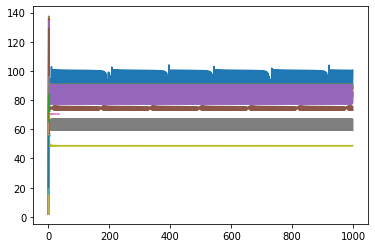

In [186]:
column  = X_train.columns
Flag = True

while(Flag == True):

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UserWarning)
        # Fit a GAM    
        gam = LogisticGAM(max_iter=1000, tol=0.001, verbose=True).fit(X_train[column], y_train)
        
        if len(column) >1 :
            print(str(len(column))+'----------------------------------------------------')
            # VIF dataframe FACTOR DE INFLACIÓN DE LA VARIANZA
            vif = pd.DataFrame()
            vif["feature"] = X_train.columns
            # calculating VIF for each feature
            vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
            #vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.values.shape[1])]

            column = vif["VIF"]
            max_value = column.max()
            indx = vif[vif['VIF'] == max_value].index

            X_train.drop(X_train.columns[indx.values[0]], axis=1, inplace=True)
            column = X_train.columns
            print(column)
            _ = plt.plot(gam.logs_['deviance'])
            
        else:
            Flag = False

In [144]:
X = df[['NOR', 'NTE', 'ORI', 'PEN', 'CEN_min', 'NTE_min', 'OCC_min', 'PEN_min']] ## Predictors
y = df['L3']

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 5)
column = X_train.columns
print(column)


Index(['CEN', 'NES', 'NOR', 'NTE', 'OCC', 'ORI', 'PEN', 'CEN_min', 'NES_min',
       'NOR_min', 'NTE_min', 'OCC_min', 'ORI_min', 'PEN_min'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/pygam/utils.py:78: UserWarning: Could not import Scikit-Sparse or Suite-Sparse.
This will slow down optimization for models with monotonicity/convexity penalties and many splines.
See installation instructions for installing Scikit-Sparse and Suite-Sparse via Conda.
  warnings.warn(msg)


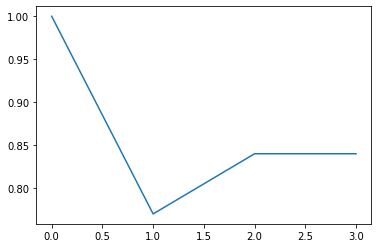

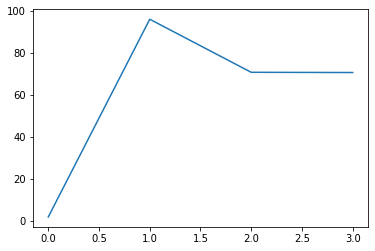

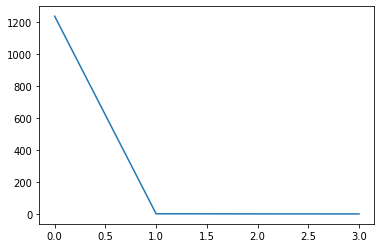

In [88]:
# Fit a GAM    
gam = LogisticGAM(max_iter=10, tol=0.1, verbose=True).fit(X_train[column], y_train)
_ = plt.plot(gam.logs_['accuracy'])
plt.show()
_ = plt.plot(gam.logs_['deviance'])
plt.show()
_ = plt.plot(gam.logs_['diffs'])
plt.show()

In [89]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     11.1895
Link Function:                        LogitLink Log Likelihood:                                   -35.1026
Number of Samples:                          100 AIC:                                                92.584
                                                AICc:                                               96.288
                                                UBRE:                                               3.0154
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4936
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [90]:
# Exactitud del modelo
print('Test accuracy GAM = ', accuracy_score(y_test, gam.predict(X_test[column])))
#compute confussion matrix 
confussion_matrix = confusion_matrix(y_test, gam.predict(X_test[column]))
print(confussion_matrix)

Test accuracy GAM =  0.7361702127659574
[[ 69  27]
 [ 35 104]]


<Figure size 432x288 with 0 Axes>

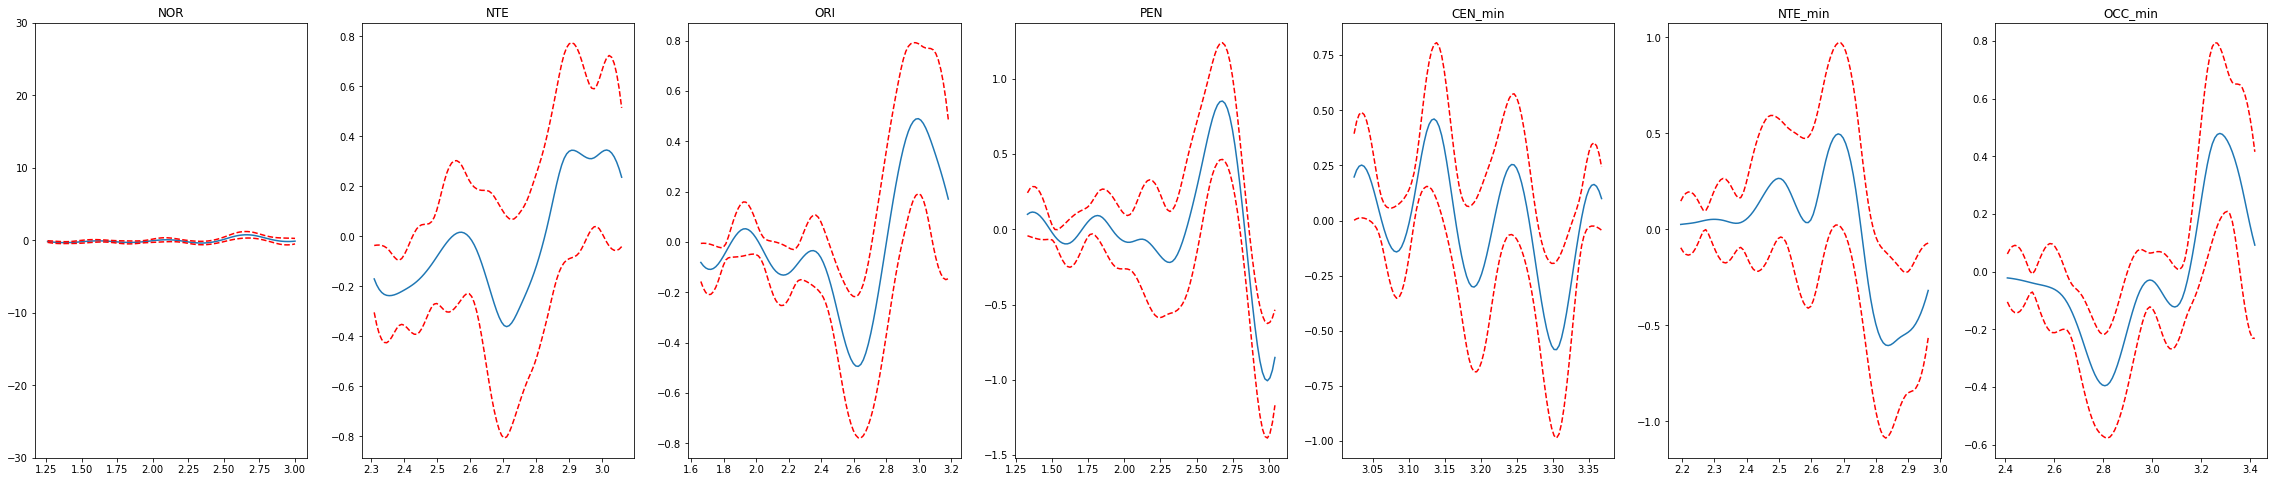

In [91]:
titles = X_test[column].columns[0:8]
plt.figure()
fig, axs = plt.subplots(1, 7, figsize=(40, 8))

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])
        
plt.show()

## Best subset in GAM

In [155]:
X = df[['CEN','NES','NOR','NTE','OCC','ORI','PEN','CEN_min','NES_min','NOR_min','NTE_min','OCC_min','ORI_min','PEN_min']] ## Predictors
X = df[['NOR', 'NTE', 'ORI', 'PEN', 'CEN_min', 'NTE_min', 'OCC_min', 'PEN_min']] ## Predictors
y = df['L3']

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 5)

In [158]:
## Loop over all possible numbers of features to be included
results = pd.DataFrame(columns=['num_features', 'features', 'accuracy'])
for k in range(1, X_train.shape[1] + 1):

    # Loop over all possible subsets of size k
    for subset in itertools.combinations(range(X_train.shape[1]), k):
        subset = list(subset)            
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            # Fit a GAM    
            gam = LogisticGAM(max_iter=1000, tol=0.001, verbose=True).fit(X_train.iloc[:, subset], y_train)         
        
            accuracy = accuracy_score(y_test, gam.predict(X_test.iloc[:, subset]))
            results = results.append(pd.DataFrame([{'num_features': k,
                                                    'features': subset,
                                                    'accuracy': accuracy}]))
print(results.sort_values('accuracy'))
subset_best = list(results.sort_values('accuracy')['features'].head(1)[0]) ## Seleccionamos el mejor subconjunto con mayor exactitud

did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
did not converge
   num_features   features  accuracy
0             1        [1]  0.634043
0             2     [1, 4]  0.642553
0             1        [4]  0.655319
0             2     [0, 5]  0.672340
0             3  [0, 3, 5]  0.676596
..          ...        ...       ...
0             2     [1, 6]  0.825532
0             2     [4, 6]  0.825532
0             1        [6]  0.829787
0             2     [0, 6]  0.84255

## Árboles de decisión

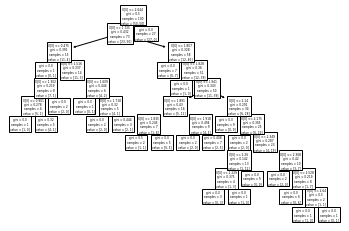

In [187]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_leaf_nodes=40)
clf = clf.fit(X_train[column], y_train)
tree.plot_tree(clf)
#metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

In [188]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("overload") 

'overload.pdf'

In [189]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_test[column].columns.values.tolist(),
                                class_names=X_test[column].columns.values.tolist(),
                                filled=True, 
                                rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

IndexError: ignored

In [190]:
# Exactitud del modelo
print('Test accuracy árbol = ', accuracy_score(y_test, clf.predict(X_test[column])))

#compute confussion matrix 
confussion_matrix = confusion_matrix(y_test, clf.predict(X_test[column]))
print(confussion_matrix)

Test accuracy árbol =  0.6893617021276596
[[76 20]
 [53 86]]


[pyGAM Documentation, Daniel Servén,2018
](https://readthedocs.org/projects/pygam/downloads/pdf/stable/)

[Doc LogisticGAM](https://pygam.readthedocs.io/en/latest/api/logisticgam.html)

[A Tour of pyGAM](https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html)

[A example of pyGAM](https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f)

[documentación pyGAM](https://pygam.readthedocs.io/en/latest/)

[pyGAM : Getting Started with Generalized Additive Models in Python](https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f)

[Building interpretable models with Generalized additive models in Python](https://medium.com/just-another-data-scientist/building-interpretable-models-with-generalized-additive-models-in-python-c4404eaf5515)

[Scikit Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

[Post pruning decision trees with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)

[Understanding the decision tree structure](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)

[Understanding Decision Tree Classification with Scikit-Learn](https://towardsdatascience.com/decision-tree-classifier-and-cost-computation-pruning-using-python-b93a0985ea77)

[Decision Tree Classifier and Cost Computation Pruning using Python](https://towardsdatascience.com/decision-tree-classifier-and-cost-computation-pruning-using-python-b93a0985ea77)